<a href="https://colab.research.google.com/github/BSniegowski/ML-uni_course/blob/main/lab/08_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title imports
import torch
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Normalize, Compose
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title Demo
dataset = CIFAR10(root='.', train=True, transform=ToTensor(), download=True)
loader = DataLoader(dataset, batch_size=15, shuffle=True)

# get a single batch
for x, y in loader:
    break

# prepare visualisations
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(30, 15))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ind = 5 * i + j
        ax.imshow(np.transpose(x[ind], (1, 2, 0)))
        ax.set_title(f"{dataset.classes[y[ind]]}", fontdict={'size': 30})
        ax.set_xticks([])
        ax.set_yticks([])

fig.tight_layout()

print(f"CIFAR10 classes: {dataset.classes}")

In [1]:
#@title MyModel
class MyModel(torch.nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv = torch.nn.Sequential(
        torch.nn.Conv2d(3, 32, kernel_size=5, stride=3, padding=2),
        torch.nn.BatchNorm2d(32),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=3, stride=1),
    )
    self.adaptivepool = torch.nn.AdaptiveAvgPool2d((6, 6))
    self.classifier = torch.nn.Sequential(
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(32*6*6, 512),
        torch.nn.ReLU(),
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(512, 10),
    )
    
  def forward(self, x):
    x = self.conv(x)
    x = self.adaptivepool(x)
    x = torch.flatten(x, start_dim=1)
    x = self.classifier(x)
    return x

NameError: ignored

In [10]:
#@title show results
def show_results(logs):
  f, ax = plt.subplots(1, 2, figsize=(16, 5))
  ax[0].plot(logs['train_accuracy'], color='C%s' % i, linestyle='--', label='train')
  ax[0].plot(logs['test_accuracy'], color='C%s' % i, label='test')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(logs['train_loss'], color='C%s' % i, linestyle='--', label='train')
  ax[1].plot(logs['test_loss'], color='C%s' % i, label='test')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

In [4]:
#@title DataLoaders
train_dataset = CIFAR10(root='.', 
                        train=True,
                        download=True,
                        transform=Compose([ToTensor()]))

test_dataset = CIFAR10(root='.', 
                       train=False,
                       download=True,
                       transform=Compose([ToTensor()]))


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=5000, shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Device:  cuda:0


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5102224f70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5102224f70>if w.is_alive():

Traceback (most recent call last):
  File "/usr

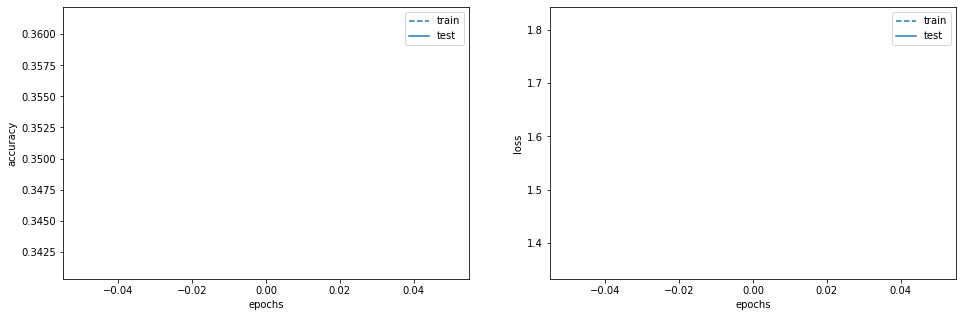

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5102224f70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5102224f70>if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

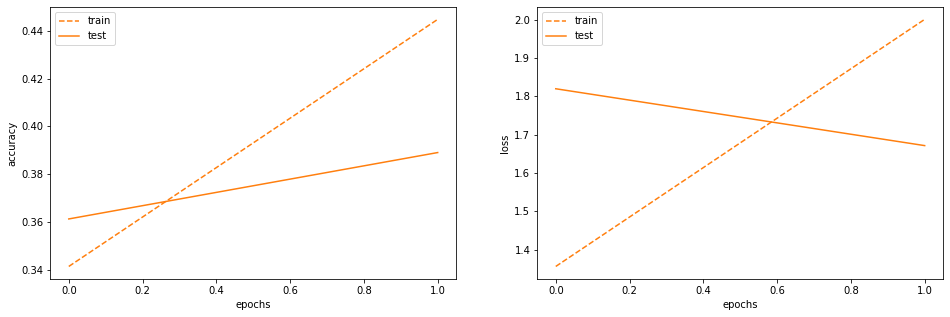

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5102224f70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5102224f70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

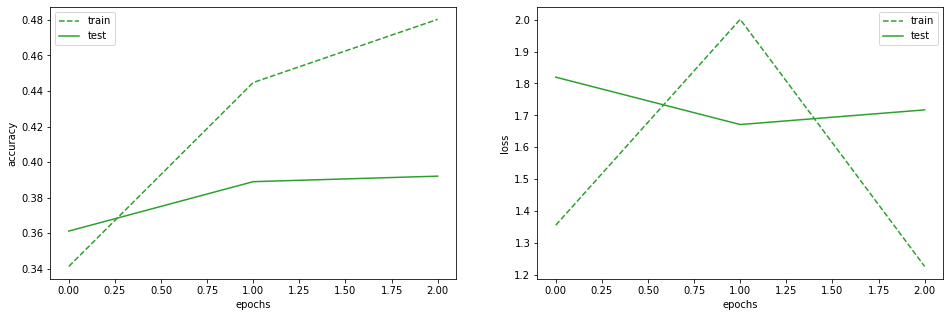

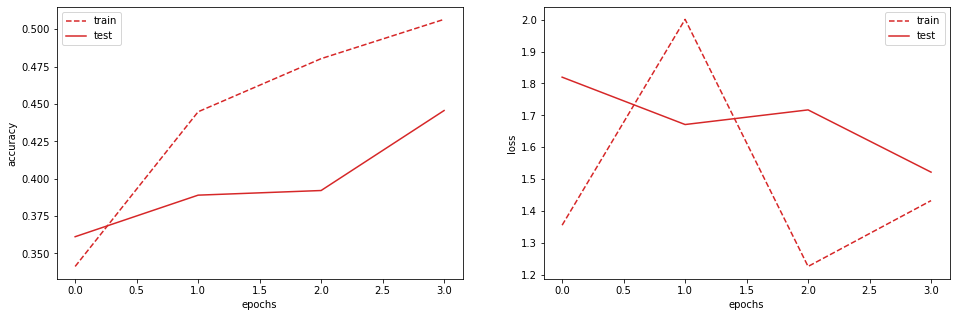

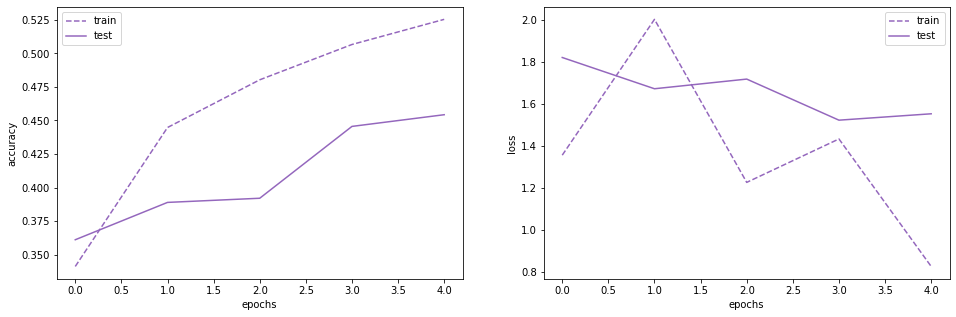

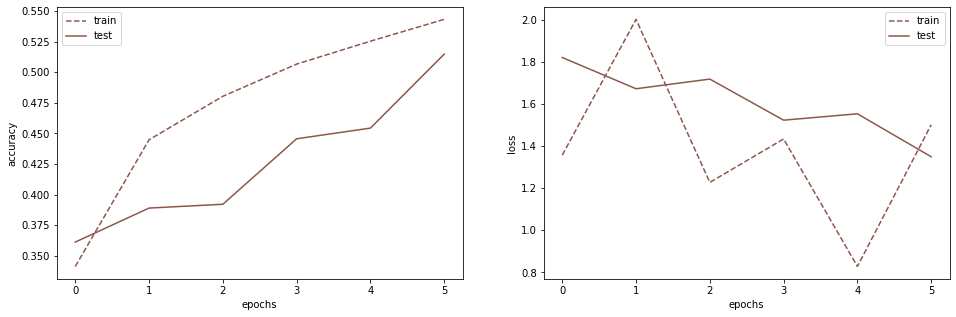

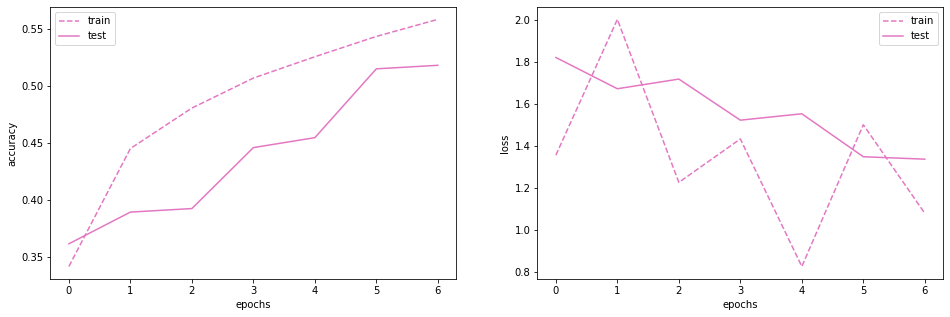

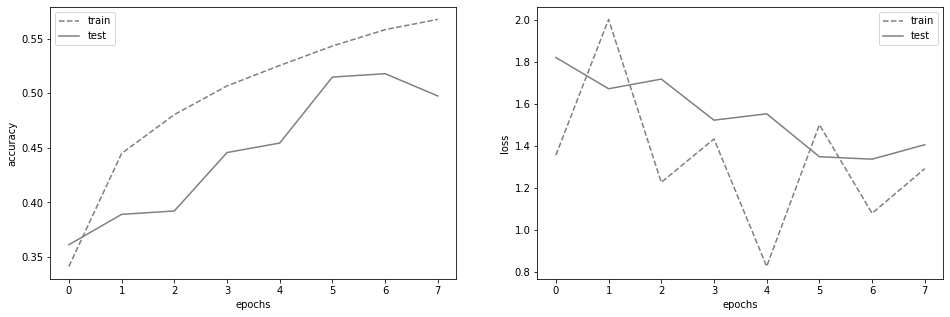

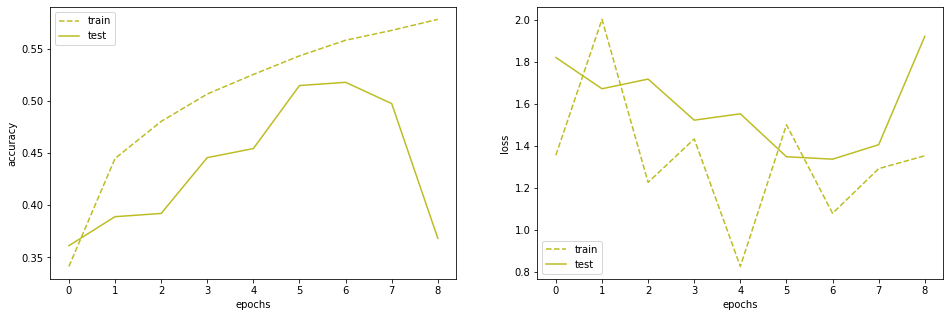

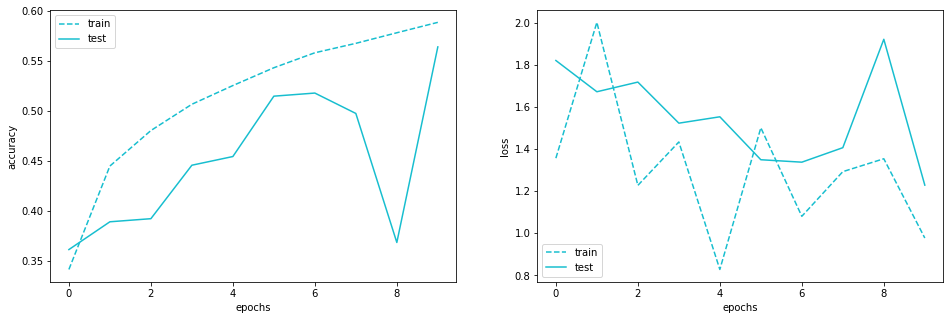

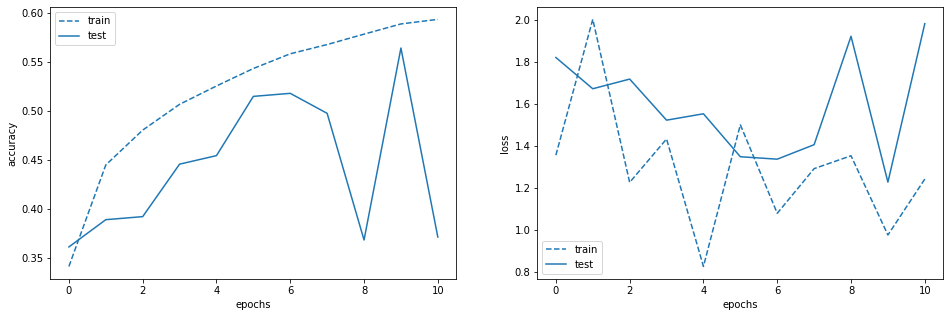

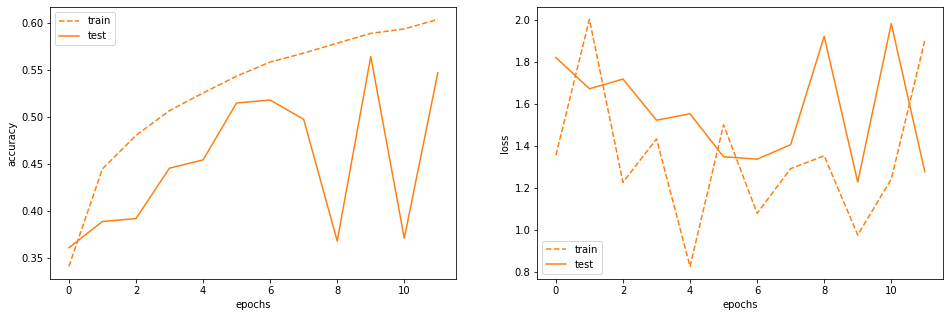

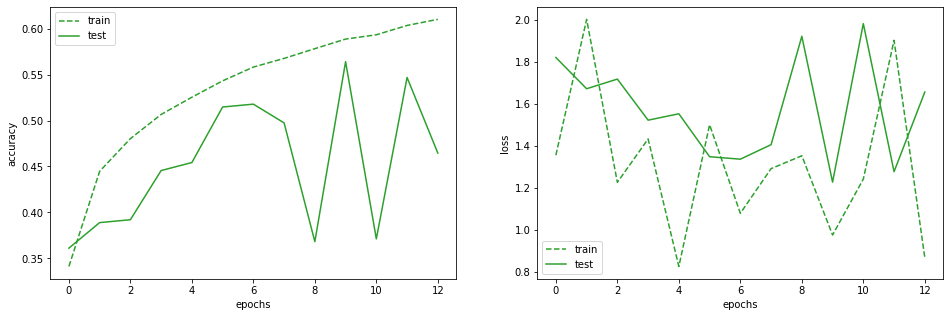

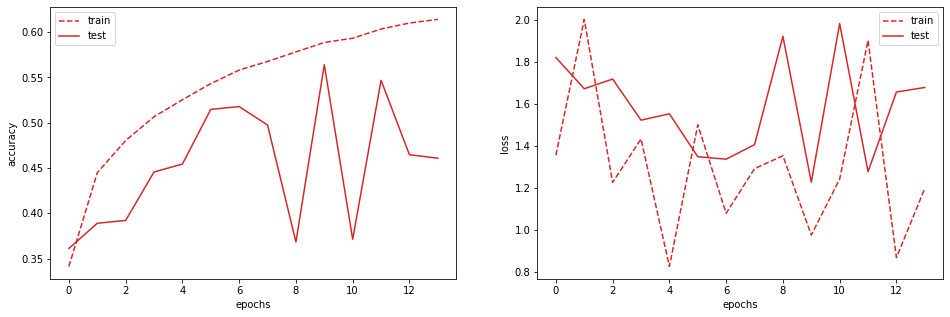

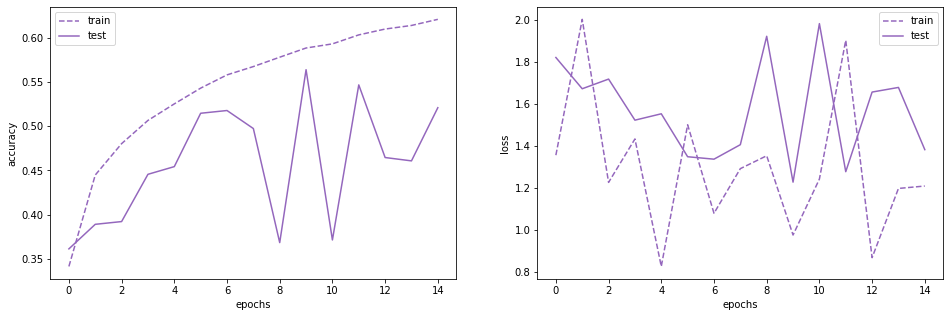

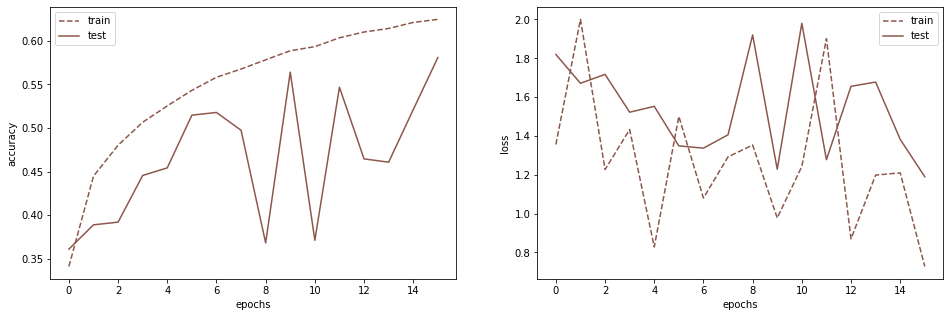

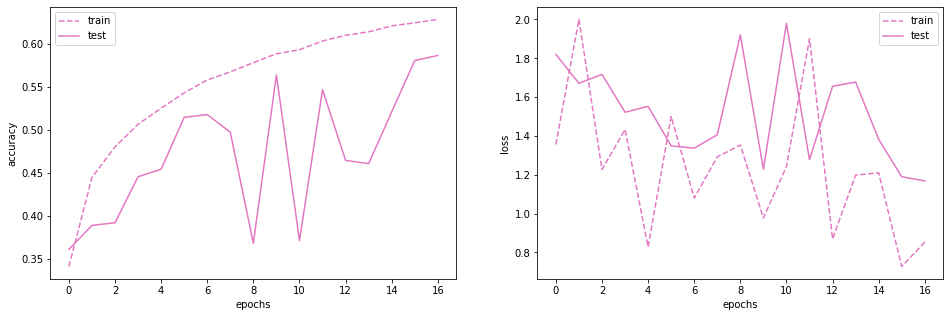

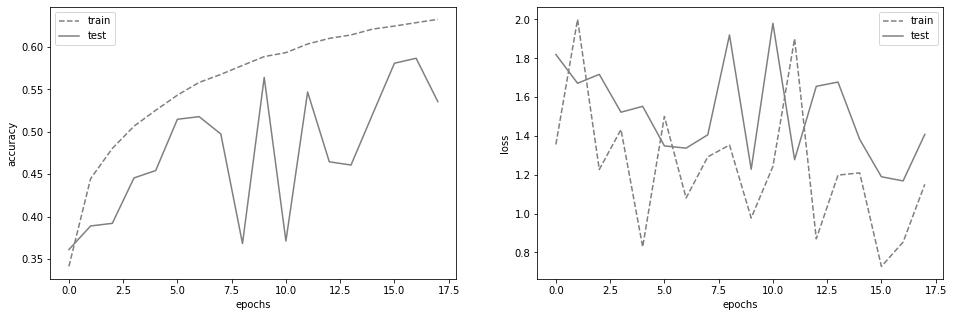

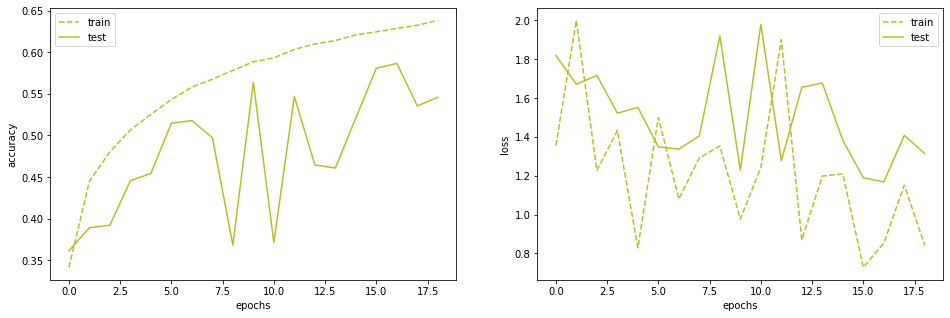

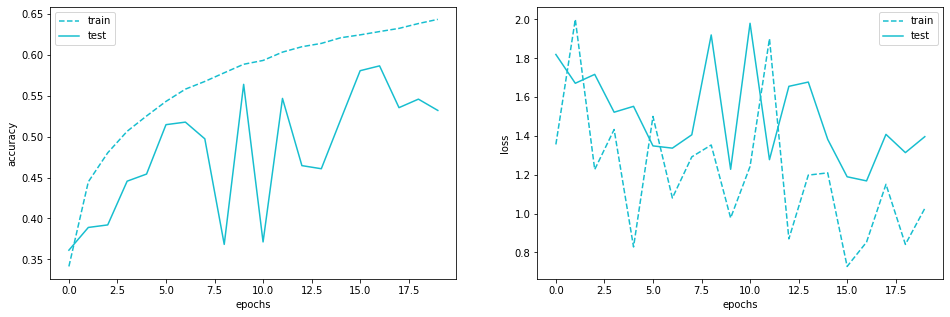

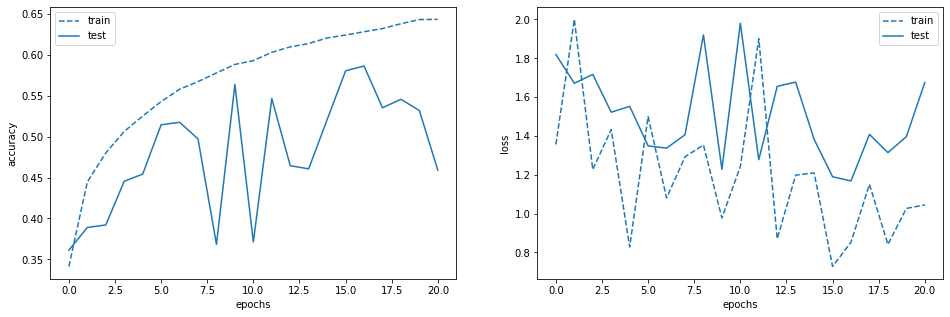

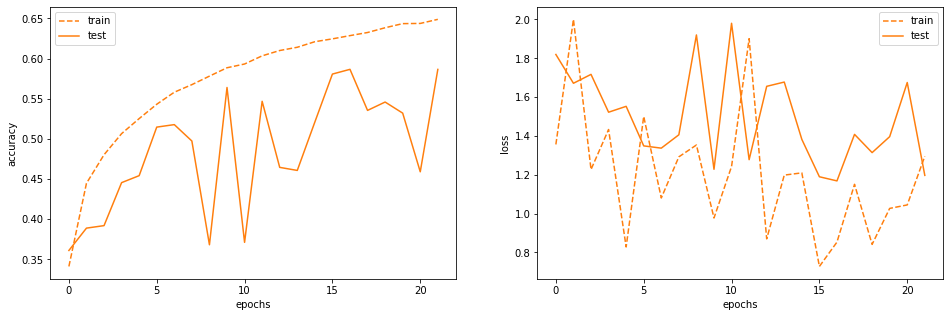

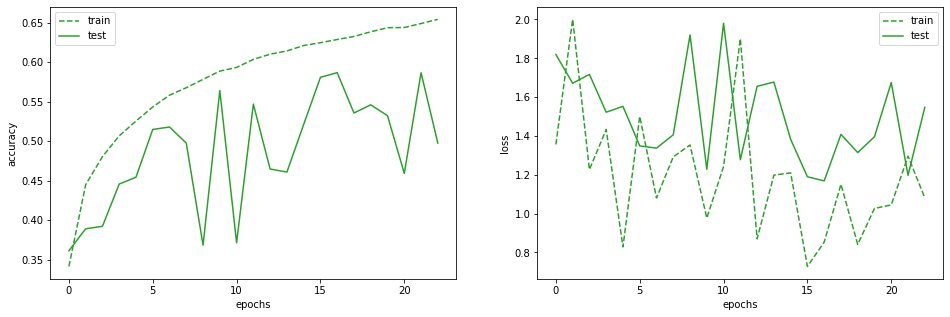

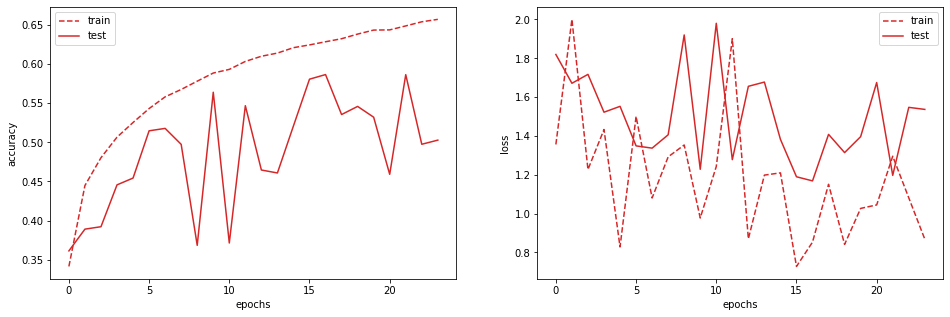

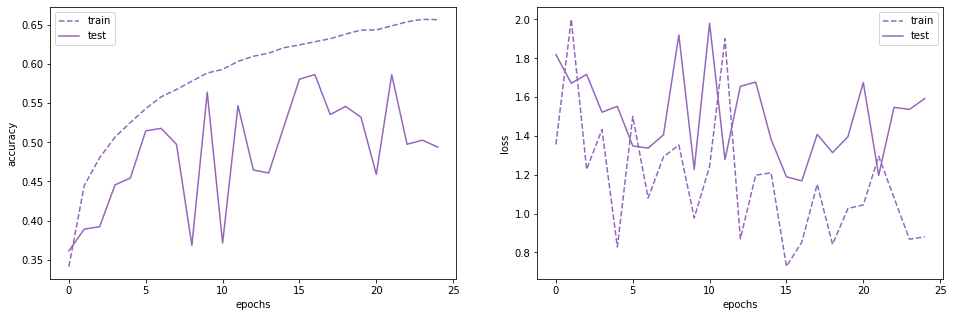

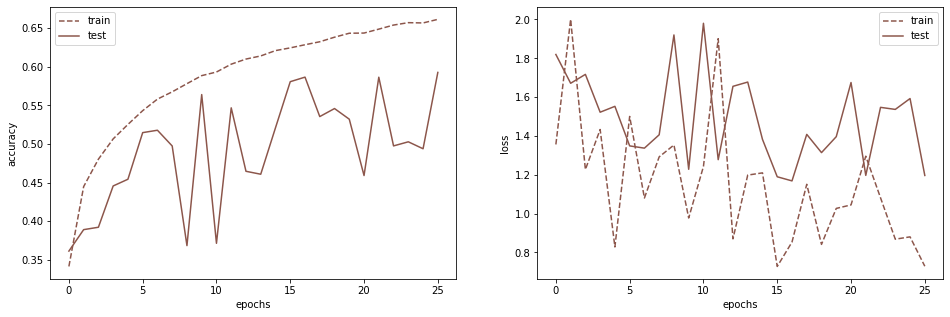

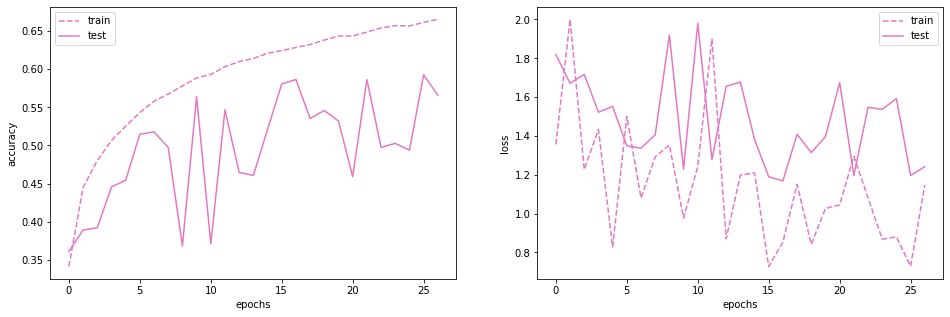

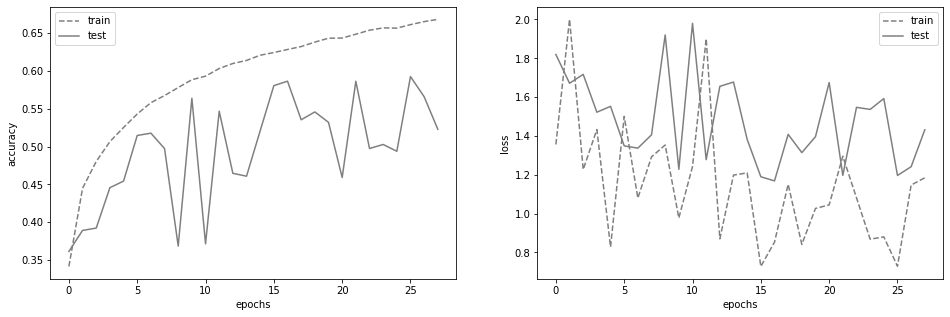

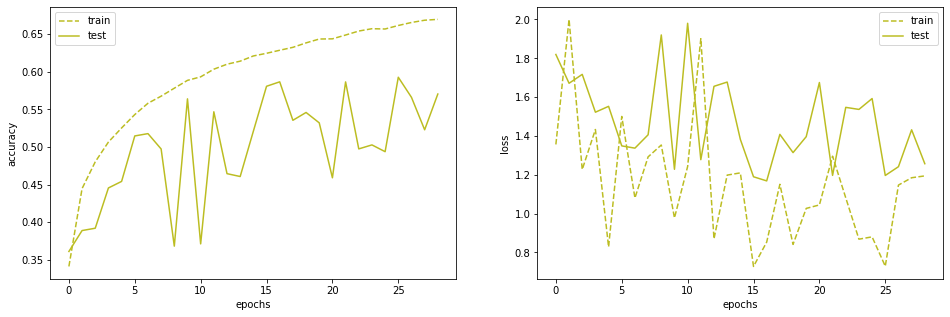

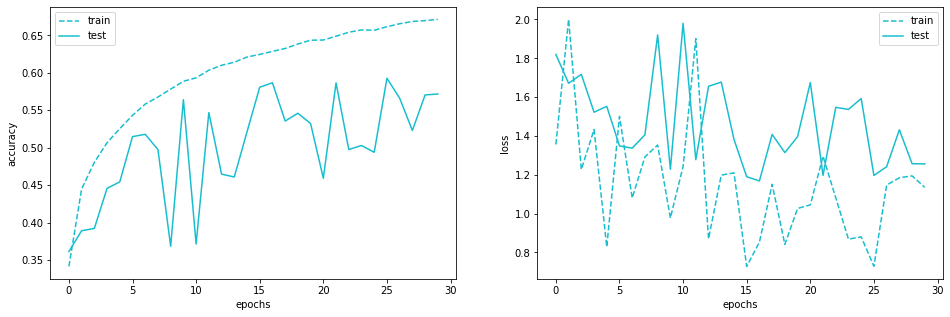

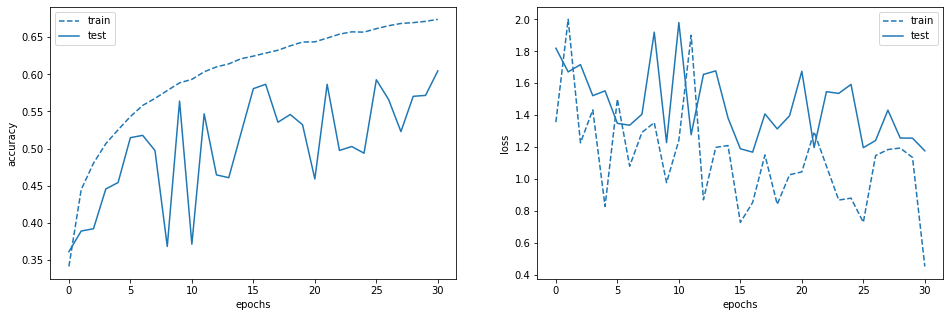

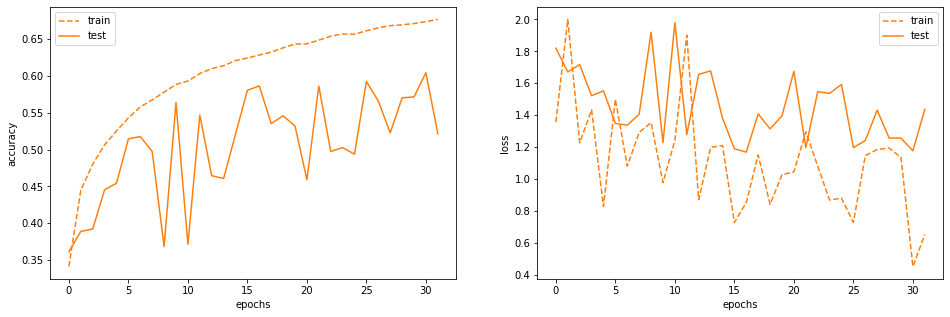

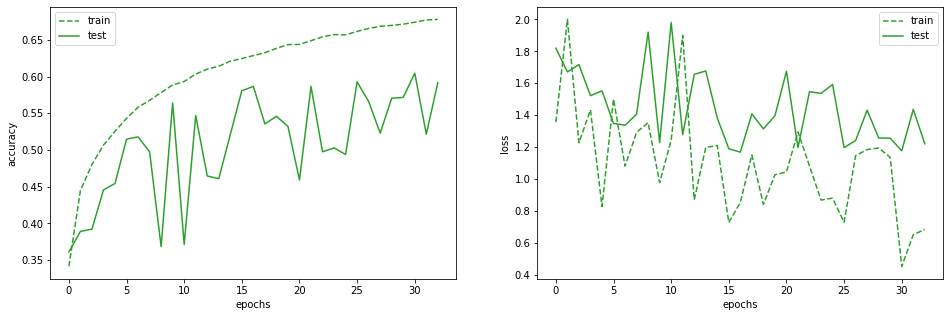

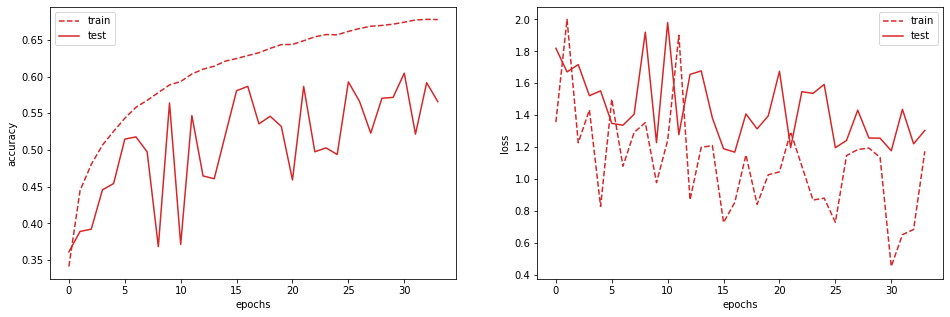

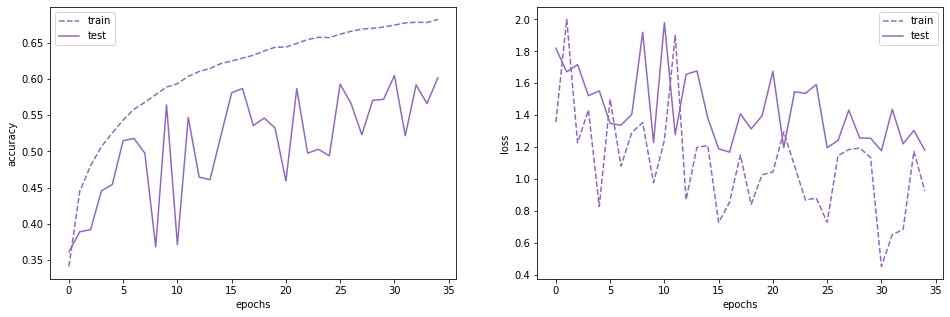

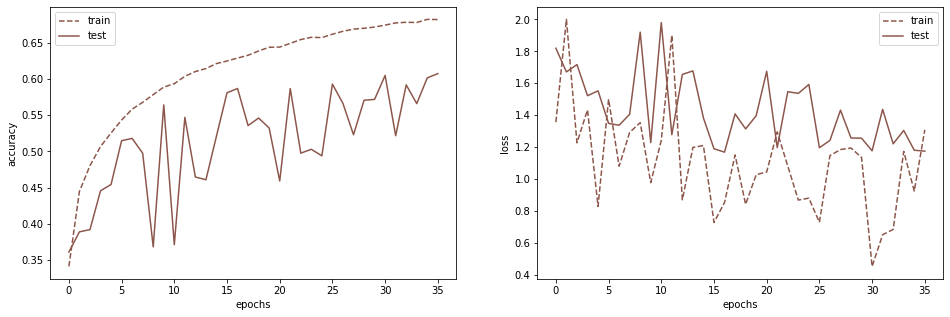

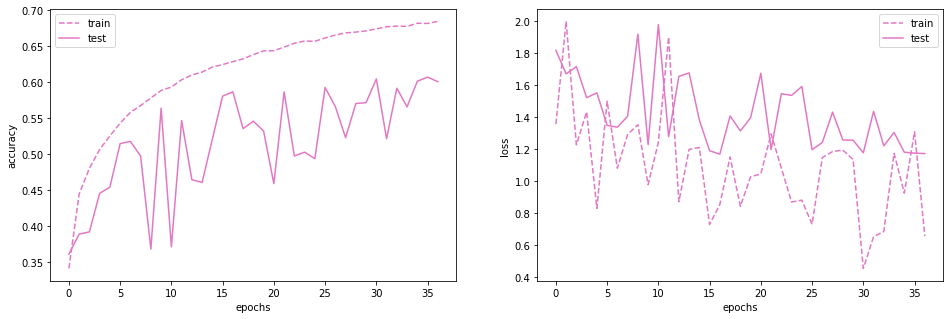

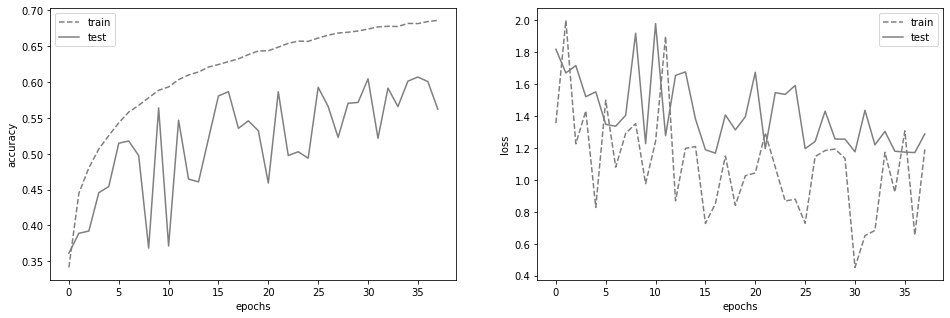

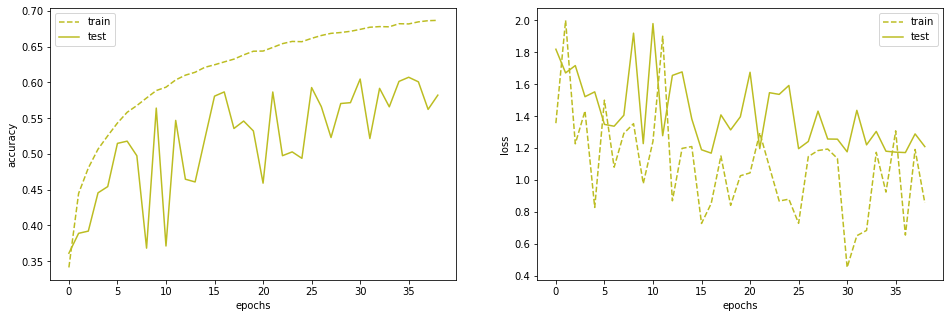

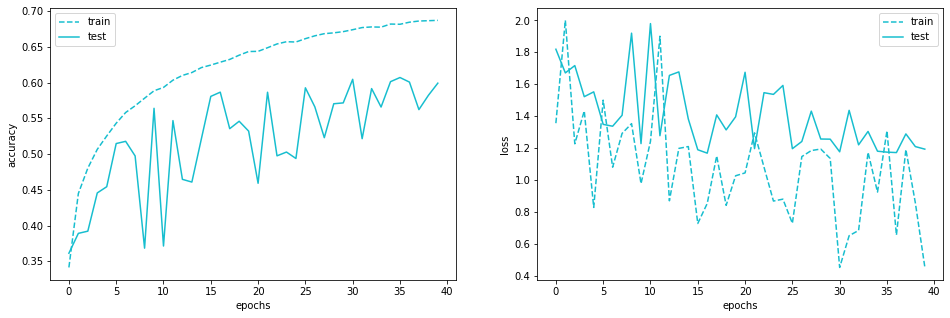

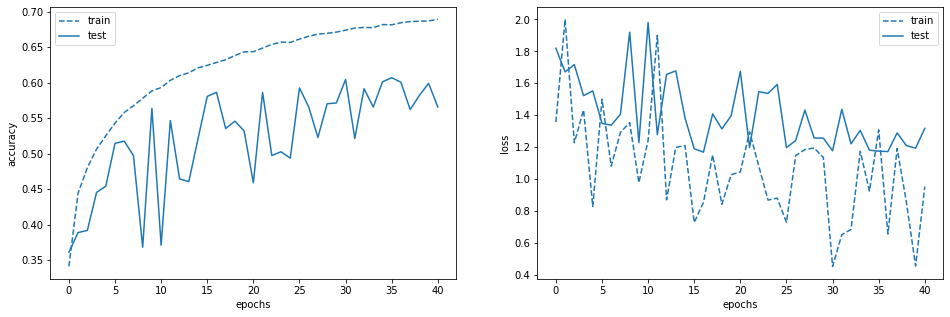

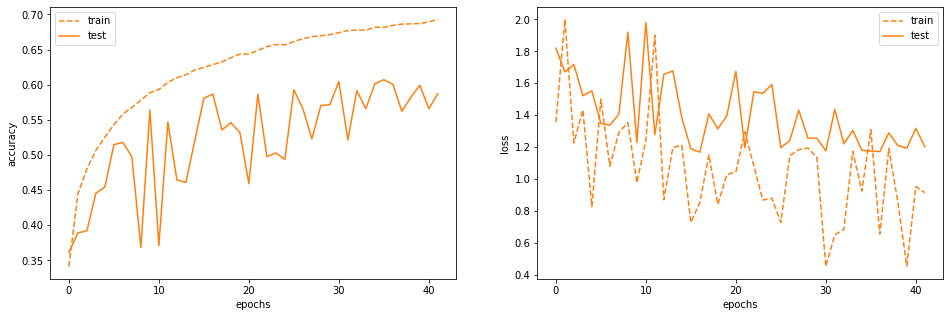

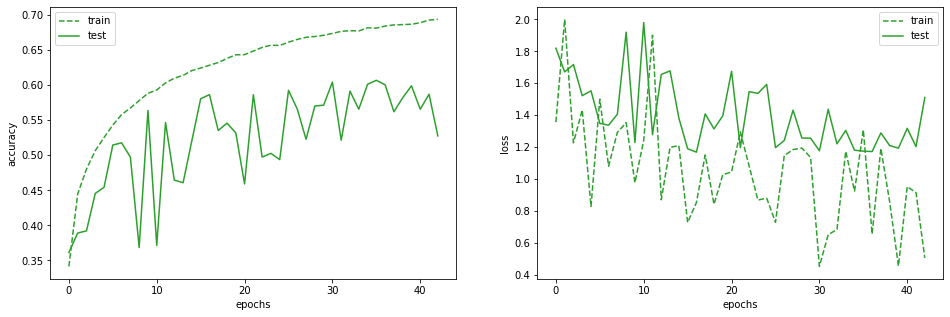

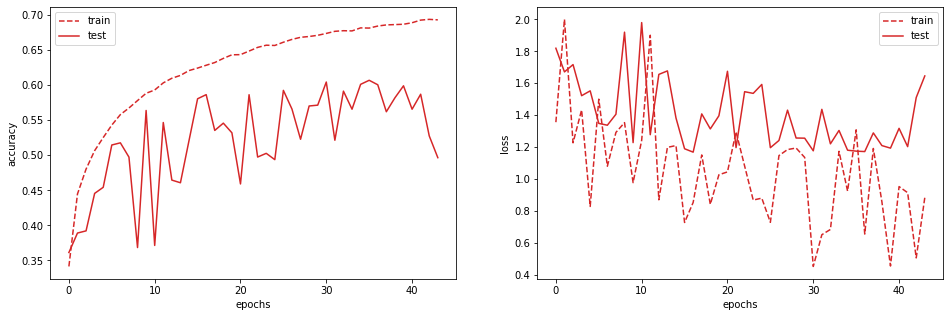

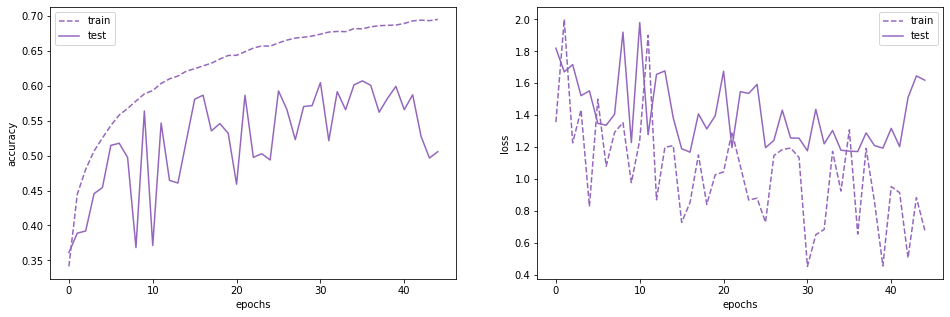

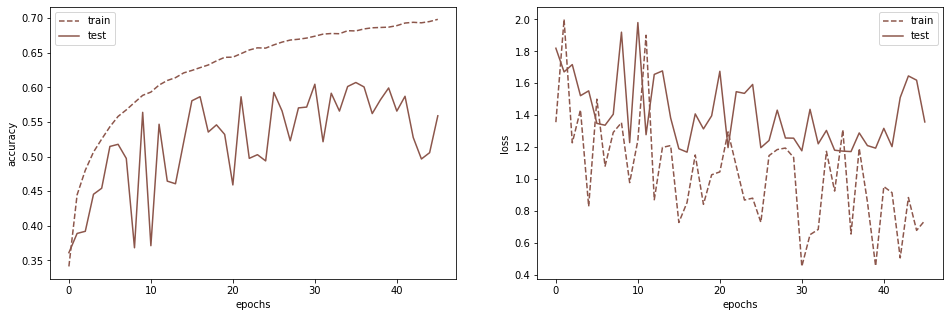

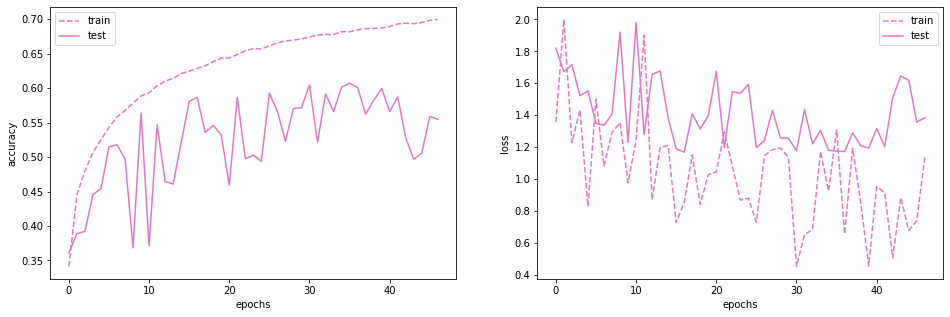

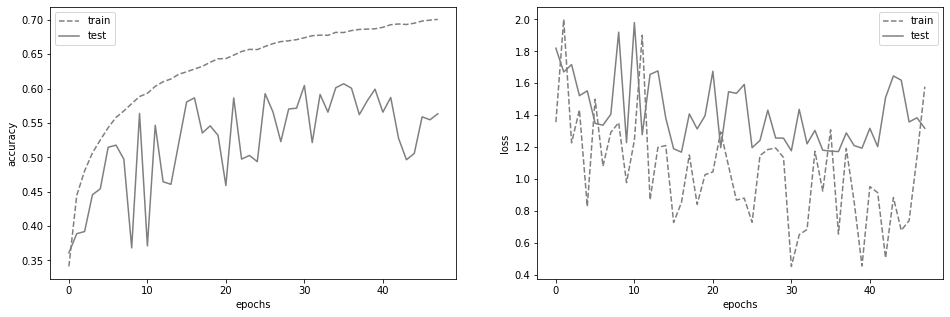

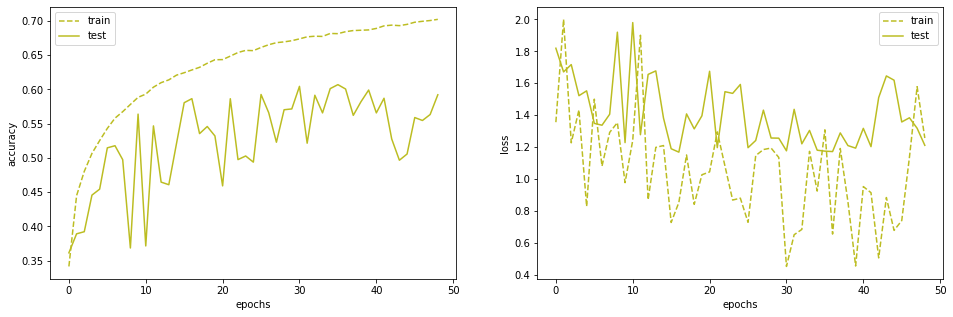

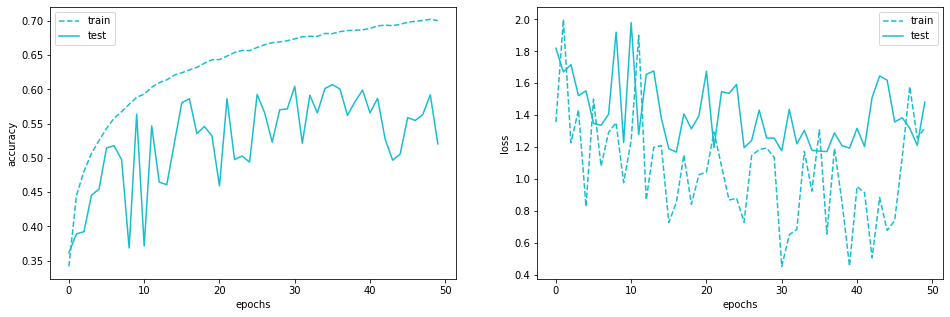

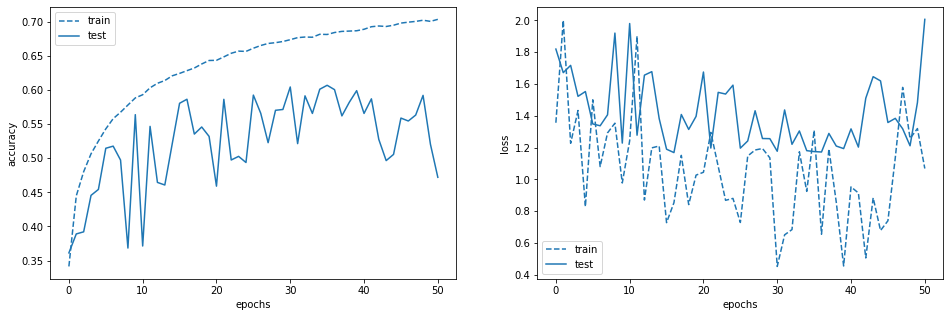

In [ ]:
#@title Training loop
model = MyModel()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Device: ', device)
model.to(device)

# Hiperparameters
learning_rate = 0.05
momentum = 0.1
n_epochs = 500

loss_fn = torch.nn.functional.cross_entropy
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# for it in model.parameters():
#   print(it.size())

# for x, y in train_loader:
#   print(x.size())
#   output = layer(x)
#   print((output.reshape(output.shape[0],-1)).size())
#   break

logs = {'train_loss': [], 'test_loss': [], 'train_accuracy': [], 'test_accuracy': []}
correct, numel = 0, 0

# for i in range(5):
#   print(i)
#   logs['test_accuracy'].append(torch.randint(low=0,high=10,size=(1,)))
#   logs['train_accuracy'].append(torch.randint(low=0,high=10,size=(1,)))
#   logs['test_loss'].append(torch.randint(low=0,high=10,size=(1,)))
#   logs['train_loss'].append(torch.randint(low=0,high=10,size=(1,)))
#   show_results(logs)
#   plt.pause(1e-10)
#   time.sleep(1)

# Training loop
for i in range(n_epochs):
  # print('test acc', logs['test_accuracy'])
  model.train()
  for x, y in train_loader:
    x = x.to(device)
    y = y.to(device)
    optimizer.zero_grad()
    output = model(x)
    y_pred = torch.argmax(output, dim=1)
    correct += torch.sum(y_pred == y).item()
    numel += train_loader.batch_size
    loss = loss_fn(output, y)
    loss.backward()
    optimizer.step()

  logs['train_loss'].append(loss.item())
  logs['train_accuracy'].append(correct / numel)
  correct, numel = 0, 0

  model.eval()
  with torch.no_grad():
    for x_test, y_test in test_loader:
      x_test = x_test.to(device)
      y_test = y_test.to(device)
      output = model(x_test)
      y_pred = torch.argmax(output, dim=1)
      correct += torch.sum(y_pred == y_test).item()
      numel += test_loader.batch_size
    loss = loss_fn(output, y_test)

  logs['test_loss'].append(loss.item())
  logs['test_accuracy'].append(correct / numel)
  correct, numel = 0, 0
  show_results(logs)
  plt.pause(1e-10)